In [1]:
%load_ext autoreload
%autoreload 2

from spyglass.spikesorting.v0 import CuratedSpikeSorting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spyglass.common import interval_list_contains, PositionIntervalMap, TaskEpoch

import os

os.chdir("/home/sambray/Documents/MS_analysis_samsplaying/")
from ms_opto_stim_protocol import OptoStimProtocol
from spyglass.common import convert_epoch_interval_name_to_position_interval_name

import matplotlib.pyplot as plt
import os

os.chdir("/home/sambray/Documents/MS_analysis_samsplaying/")
from Analysis.spiking_analysis import smooth
from Analysis.position_analysis import get_running_intervals
from Analysis.utils import filter_opto_data, get_running_valid_intervals,violin_scatter
from Analysis.spiking_autocorrelegram import autocorrelegram,plot_periodicity_dependence
from Style.style_guide import interval_style, animal_style

[2024-05-21 11:45:04,642][INFO]: Connecting sambray@lmf-db.cin.ucsf.edu:3306
[2024-05-21 11:45:04,692][INFO]: Connected sambray@lmf-db.cin.ucsf.edu:3306


In [9]:
# import os
# os.path.exists('./Plots/gm_20240227/')

True

# Open Loop

datasets: 2


[12:04:21][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`ms_opto_stim_protocol`.`__opto_stim_protocol`', '`spikesorting_merge`.`spike_sorting_output`'}. Please submit a bug report with the snippet used.
[12:04:22][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`ms_opto_stim_protocol`.`__opto_stim_protocol`', '`spikesorting_merge`.`spike_sorting_output`'}. Please submit a bug report with the snippet used.
[12:04:23][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`ms_opto_stim_protocol`.`__opto_stim_protocol`', '`spikesorting_merge`.`spike_sorting_output`'}. Please submit a bug report with the snippet used.
[12:04:24][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`ms_opto_stim_protocol`.`__opto_stim_protocol`', '`spikesorting_merge`.`spike_sorting_o

linear_limits [10, 126.8923664781934]


[2024-05-14 12:04:55,167][WARNING]: Skipped checksum for file with hash: f5118d6f-feeb-70ef-73da-912dd48edd6e, and path: /stelmo/nwb/raw/Totoro20220602_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace

linear_limits [10, 126.8923664781934]


[2024-05-14 12:05:30,589][WARNING]: Skipped checksum for file with hash: 43b9576d-481d-6c4d-0cbd-9badac7128f2, and path: /stelmo/nwb/raw/Totoro20220603_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

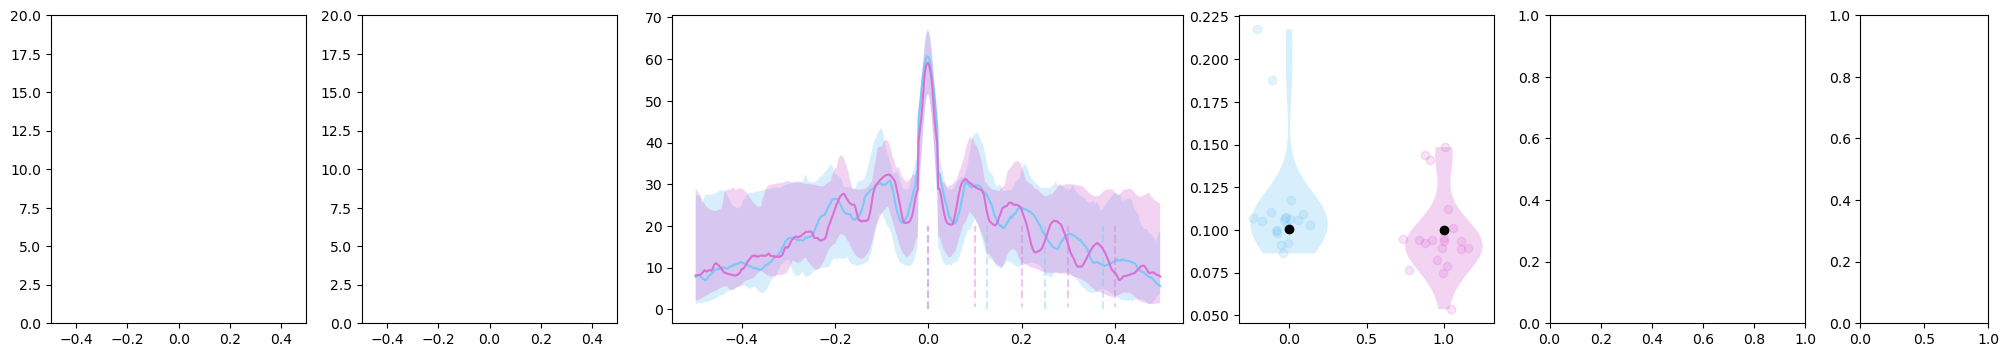

In [2]:
from Analysis.spiking_autocorrelegram import autocorrelegram,plot_periodicity_dependence
plt.rcParams['svg.fonttype'] = 'none'
period = 50
animal = "Totoro"
min_spikes = 300
periods = [250,165,125,100,80,50]
periods = [100]
periodicities = []
for period in periods:
    dataset_key = {"animal":animal,
                "period_ms":period,
                "min_pulse_length":20,
                #    "targeted_phase":90
                }
    fig, periodicity, autocorr = autocorrelegram(dataset_key, return_periodicity_results=True,
                                                 return_auto_corr=True)
    periodicities.append(periodicity)
    # fig.savefig(f"./Plots/gm_20240227/autocorrelogram_{animal}_{period}.svg")
    # fig.savefig(f"./Plots/gm_20240227/autocorrelogram_{animal}_{period}.pdf")
    
    break
fig_periodicity = plot_periodicity_dependence(periodicities, periods)
# fig_periodicity.savefig(f"./Plots/gm_20240227/autocorrelogram_periodicity_dependence_{animal}.svg")
# fig_periodicity.savefig(f"./Plots/gm_20240227/autocorrelogram_periodicity_dependence_{animal}.pdf")

## Abhilasha paper method

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f4077c72fd0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f4077c72220>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f4077c72cd0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f4077c72370>}

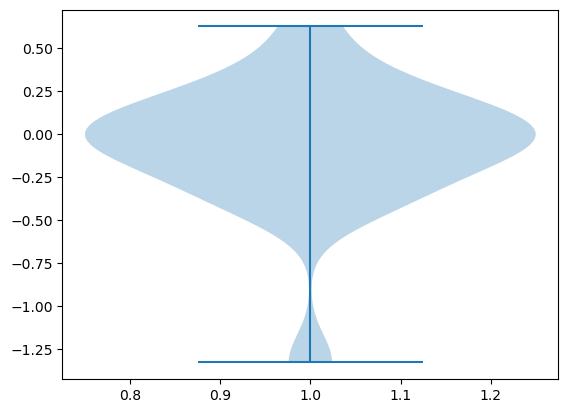

In [113]:
autocorr[0].shape




rhythm = [rhythmicity(data) for data in autocorr]
rhythm  = (rhythm[1]-rhythm[0])/rhythm[0]
plt.violinplot(rhythm)
# plt.scatter(np.ones(len(rhythm[0])),rhythm[0])
# plt.scatter(np.ones(len(rhythm[1]))*2,rhythm[1])

# for x1,x2 in zip(rhythm[0],rhythm[1]):
#     plt.plot([1,2],[x1,x2],color='black',alpha=0.1)

## fft method

In [111]:
def analyze_rhythmicity(x, tau, freq_range):
    # Calculate the sampling frequency
    sampling_interval = np.mean(np.diff(tau))
    
    # Apply Fourier Transform to the autocorrelation series
    power_spectrum = np.abs(np.fft.fft(x)) ** 2
    frequencies = np.fft.fftfreq(x.size, d=sampling_interval)
    
    # Ensure positive frequencies and corresponding power spectrum
    positive_frequencies = frequencies[:len(frequencies)//2]
    positive_power_spectrum = power_spectrum[:len(power_spectrum)//2]
    
    # Identify the index range for the specified frequency range
    freq_index = np.where((positive_frequencies >= freq_range[0]) & (positive_frequencies <= freq_range[1]))[0]
    
    # Find the peak frequency within the specified range
    peak_index = np.argmax(positive_power_spectrum[freq_index])
    peak_frequency = positive_frequencies[freq_index][peak_index]
    peak_power = positive_power_spectrum[freq_index][peak_index]
    
    print(f"Peak Frequency: {peak_frequency} Hz")
    
    # Return the power amplitude of the peak frequency
    return peak_power,positive_power_spectrum, positive_frequencies

from scipy.signal import welch
def analyze_rhythmicity_with_welch(x, tau, freq_range, nperseg=None):
    # Calculate the sampling frequency
    sampling_interval = tau[1] - tau[0]
    fs = 1 / sampling_interval
    
    # Use Welch's method to compute the power spectral density
    frequencies, power_spectrum = welch(x, fs=fs, nperseg=nperseg, scaling='spectrum',nfft=10000)
    
    # Identify the index range for the specified frequency range
    freq_index = np.where((frequencies >= freq_range[0]) & (frequencies <= freq_range[1]))[0]
    
    # Find the peak frequency within the specified range
    peak_index = np.argmax(power_spectrum[freq_index])
    peak_frequency = frequencies[freq_index][peak_index]
    peak_power = power_spectrum[freq_index][peak_index]
    
    print(f"Peak Frequency: {peak_frequency} Hz")
    
    # Return the power amplitude of the peak frequency
    return peak_power, power_spectrum, frequencies

# Closed Loop

datasets: 2


[12:33:49][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:33:50][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:33:50][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:33:51][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decodi

linear_limits [10, 126.8923664781934]


[2024-05-21 12:34:19,217][WARNING]: Skipped checksum for file with hash: 4b5f77e9-2131-4188-245b-00b7ae3f6801, and path: /stelmo/nwb/raw/Wallie20220914_.nwb
[12:34:19][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:34:20][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:34:21][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:34:21][WARN

linear_limits [10, 126.8923664781934]


[2024-05-21 12:34:48,904][WARNING]: Skipped checksum for file with hash: 4b5f77e9-2131-4188-245b-00b7ae3f6801, and path: /stelmo/nwb/raw/Wallie20220914_.nwb


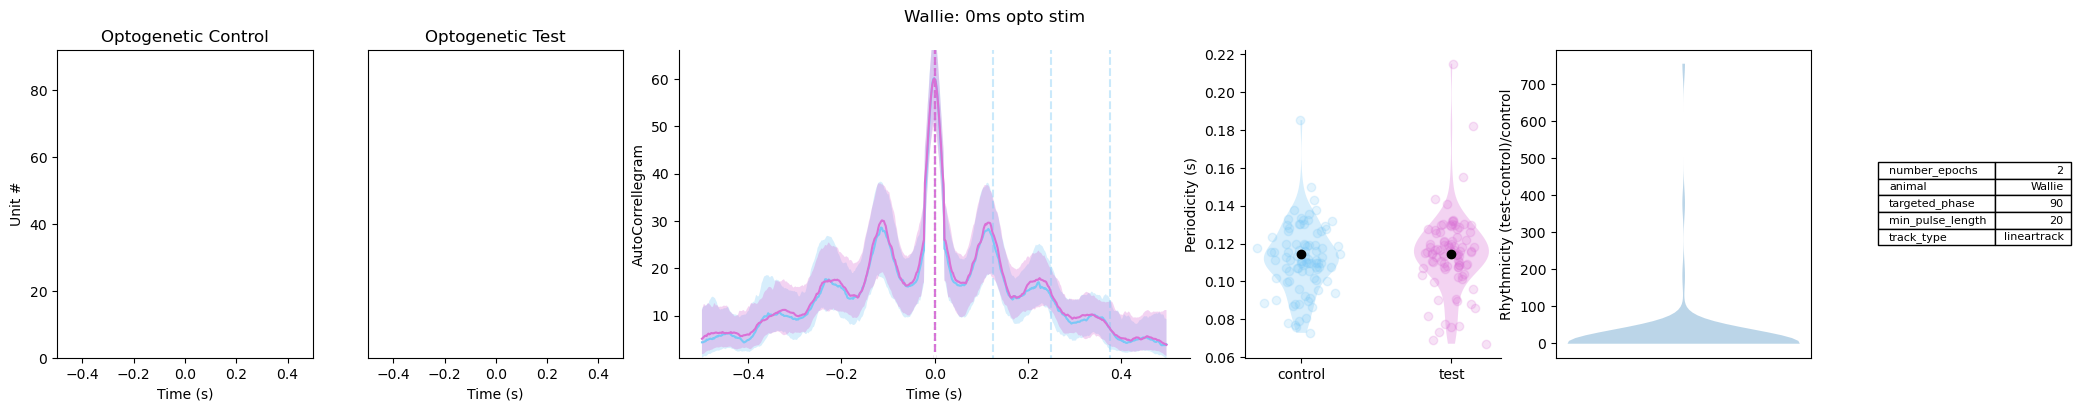

In [13]:
dataset_key = {
        "animal": "Wallie",
        "targeted_phase": 90,
        "min_pulse_length": 20,
        "track_type": "lineartrack",  # lineartrack"
    }
fig, periodicity, autocorr = autocorrelegram(
    dataset_key,
    return_periodicity_results=True,
    return_auto_corr=True,
    linear_detrend=False,
)

datasets: 2


[12:35:09][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:35:10][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:35:11][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:35:11][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decodi

linear_limits [10, 126.8923664781934]


[2024-05-21 12:35:34,449][WARNING]: Skipped checksum for file with hash: 9d8a5a49-96aa-de26-7e0c-7f0069c6677d, and path: /stelmo/nwb/raw/Winnie20220717_.nwb
[12:35:35][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:35:35][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:35:36][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:35:37][WARN

linear_limits [10, 126.8923664781934]


[2024-05-21 12:36:01,412][WARNING]: Skipped checksum for file with hash: 9d8a5a49-96aa-de26-7e0c-7f0069c6677d, and path: /stelmo/nwb/raw/Winnie20220717_.nwb
/home/sambray/Documents/MS_analysis_samsplaying/Analysis/spiking_autocorrelegram.py:425: PeakPropertyWarning: some peaks have a width of 0
  peaks, _ = find_peaks(autocorr, width=width)
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


datasets: 2


[12:36:02][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:36:03][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:36:03][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:36:04][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decodi

linear_limits [10, 123.30416347586447]


[2024-05-21 12:36:14,396][WARNING]: Skipped checksum for file with hash: 1f5c50a7-0065-fa56-18eb-45182d0fa2f5, and path: /stelmo/nwb/raw/Frodo20230810_.nwb
[12:36:15][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:36:15][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:36:16][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:36:17][WARNI

linear_limits [10, 123.30416347586447]


[2024-05-21 12:36:27,946][WARNING]: Skipped checksum for file with hash: 6d808fc5-4451-72e0-8008-5d012e52bddf, and path: /stelmo/nwb/raw/Frodo20230811_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


datasets: 2


[12:36:28][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:36:29][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:36:30][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:36:30][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decodi

linear_limits [10, 126.8923664781934]


[2024-05-21 12:37:02,162][WARNING]: Skipped checksum for file with hash: 7ed2c389-5010-5a81-4934-91cc2b37f8d4, and path: /stelmo/nwb/raw/Totoro20220607_.nwb
[12:37:02][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:37:03][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:37:04][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:37:05][WARN

linear_limits [10, 126.8923664781934]


[2024-05-21 12:37:21,147][WARNING]: Skipped checksum for file with hash: 7ed2c389-5010-5a81-4934-91cc2b37f8d4, and path: /stelmo/nwb/raw/Totoro20220607_.nwb


datasets: 2


[12:37:22][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:37:22][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:37:23][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:37:24][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decodi

linear_limits [10, 126.8923664781934]


[2024-05-21 12:37:51,614][WARNING]: Skipped checksum for file with hash: 4b5f77e9-2131-4188-245b-00b7ae3f6801, and path: /stelmo/nwb/raw/Wallie20220914_.nwb
[12:37:52][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:37:52][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:37:53][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:37:54][WARN

linear_limits [10, 126.8923664781934]


[2024-05-21 12:38:21,134][WARNING]: Skipped checksum for file with hash: 4b5f77e9-2131-4188-245b-00b7ae3f6801, and path: /stelmo/nwb/raw/Wallie20220914_.nwb


datasets: 2


[12:38:22][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:38:22][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:38:23][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:38:24][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decodi

linear_limits [10, 126.8923664781934]


[2024-05-21 12:38:39,982][WARNING]: Skipped checksum for file with hash: eaf52893-1419-fe04-2ba5-a2b8ea80f655, and path: /stelmo/nwb/raw/Olive20220707_.nwb
[12:38:40][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:38:41][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:38:41][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:38:42][WARNI

linear_limits [10, 126.8923664781934]


[2024-05-21 12:38:58,269][WARNING]: Skipped checksum for file with hash: eaf52893-1419-fe04-2ba5-a2b8ea80f655, and path: /stelmo/nwb/raw/Olive20220707_.nwb


datasets: 2


[12:38:59][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:38:59][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:39:00][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:39:01][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decodi

linear_limits [10, 126.8923664781934]


[2024-05-21 12:39:25,362][WARNING]: Skipped checksum for file with hash: 1fb4cf78-9ee6-df68-2734-4b3c6f0f8e42, and path: /stelmo/nwb/raw/Yoshi20220513_.nwb
[12:39:26][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:39:26][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:39:27][WARNING] Spyglass: Multiple classes found in stack: {'`spikesorting_curation`.`__curated_spike_sorting`', '`spikesorting_merge`.`spike_sorting_output`', '`decoding_sorted_spikes_v1`.`__sorted_spikes_decoding_v1`'}. Please submit a bug report with the snippet used.
[12:39:28][WARNI

linear_limits [10, 126.8923664781934]


[2024-05-21 12:39:49,197][WARNING]: Skipped checksum for file with hash: 1fb4cf78-9ee6-df68-2734-4b3c6f0f8e42, and path: /stelmo/nwb/raw/Yoshi20220513_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(-0.02, 1.2)

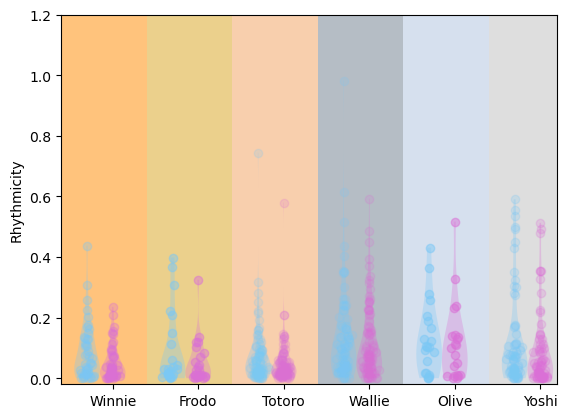

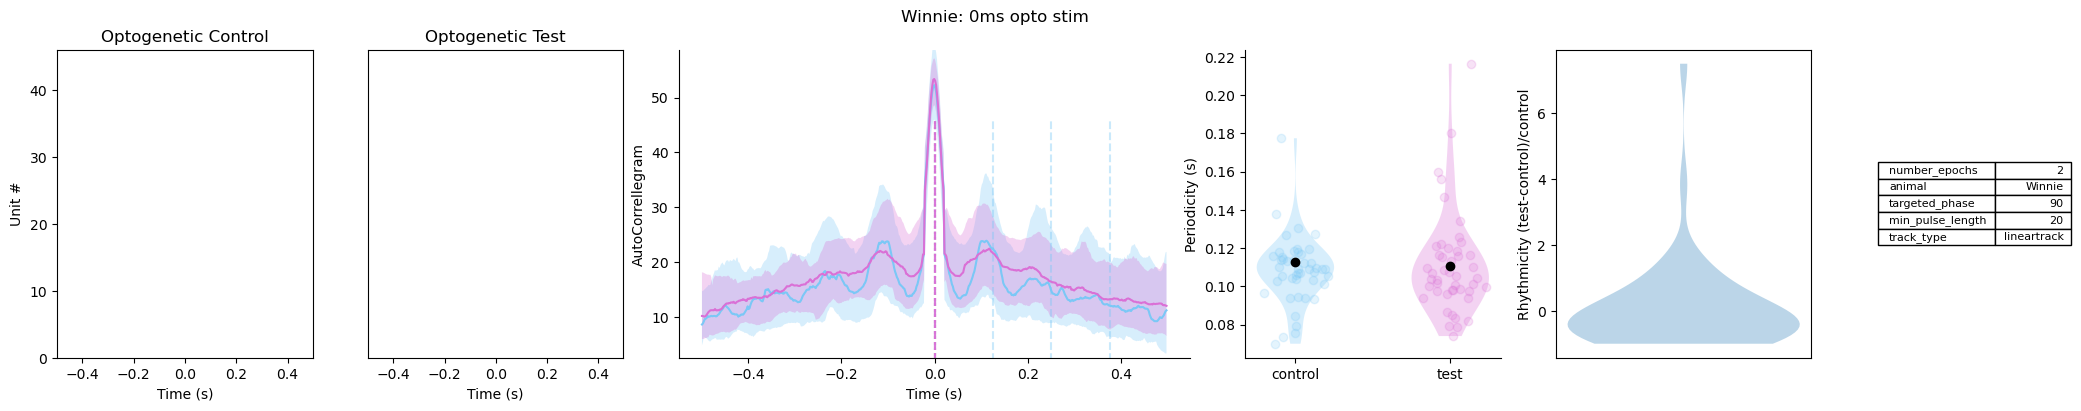

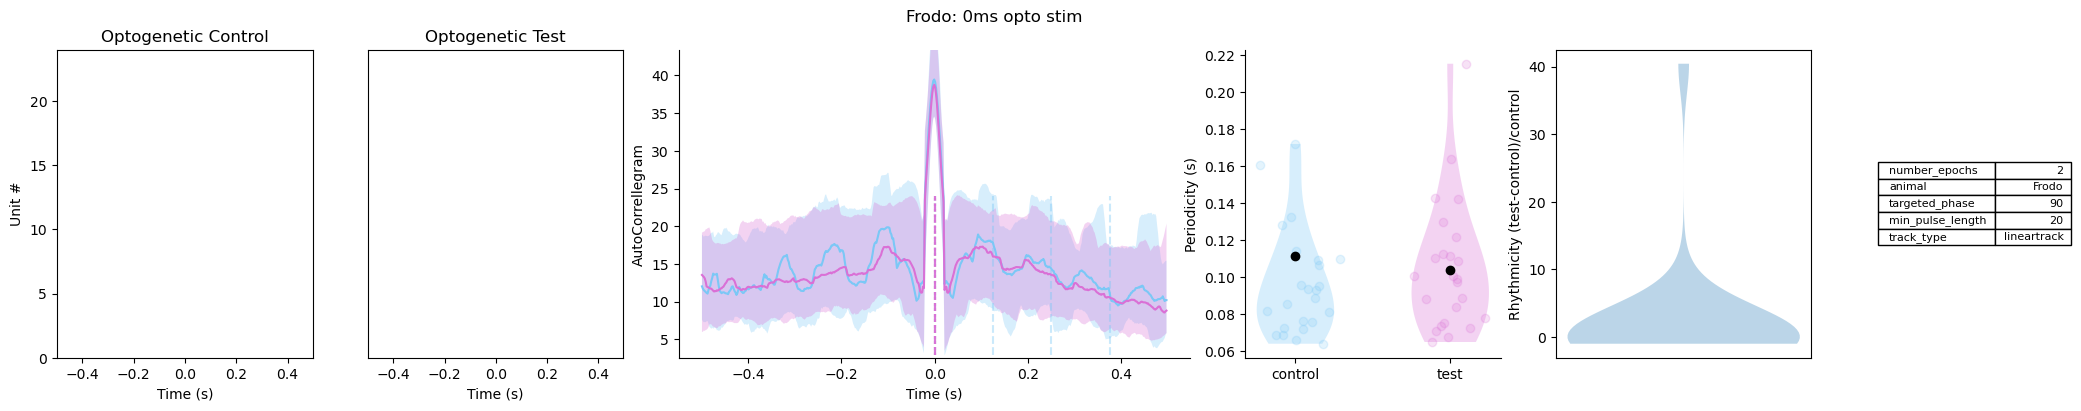

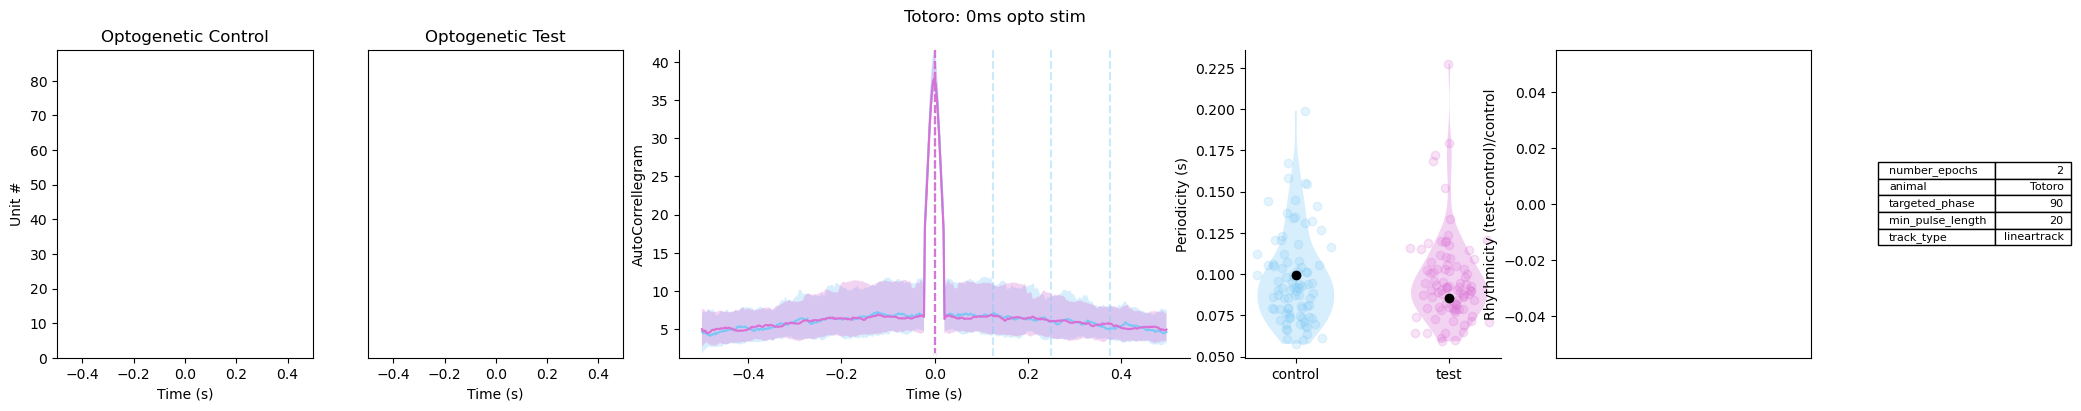

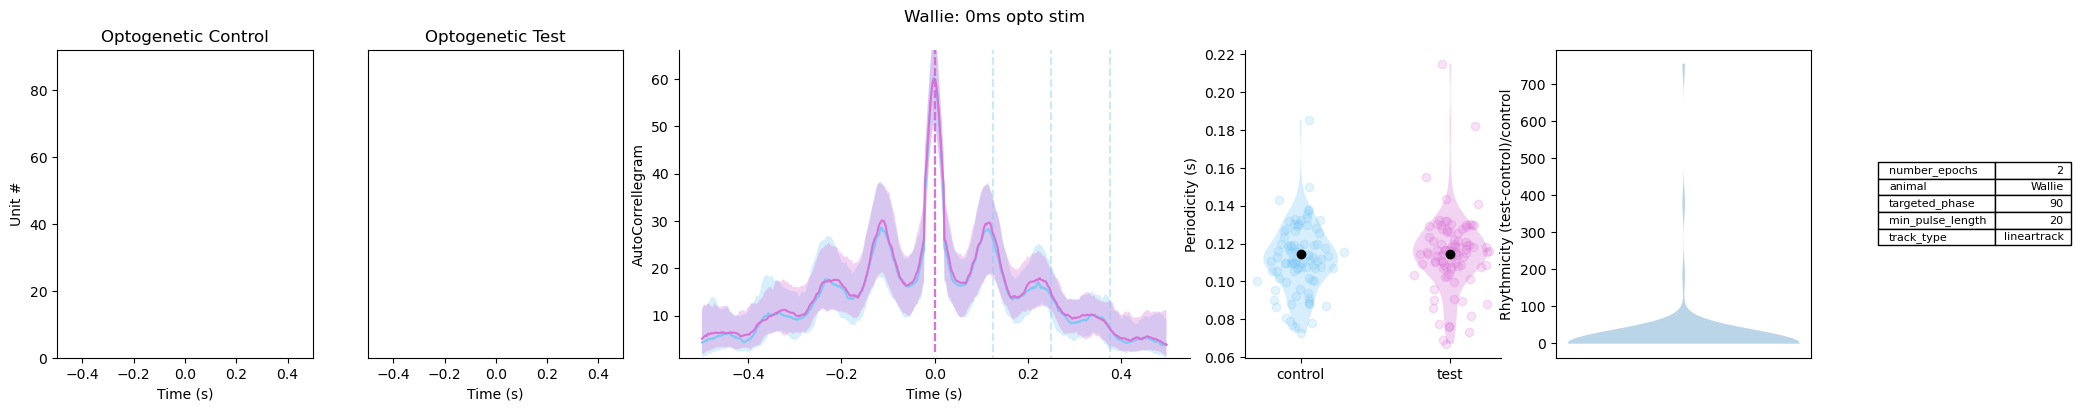

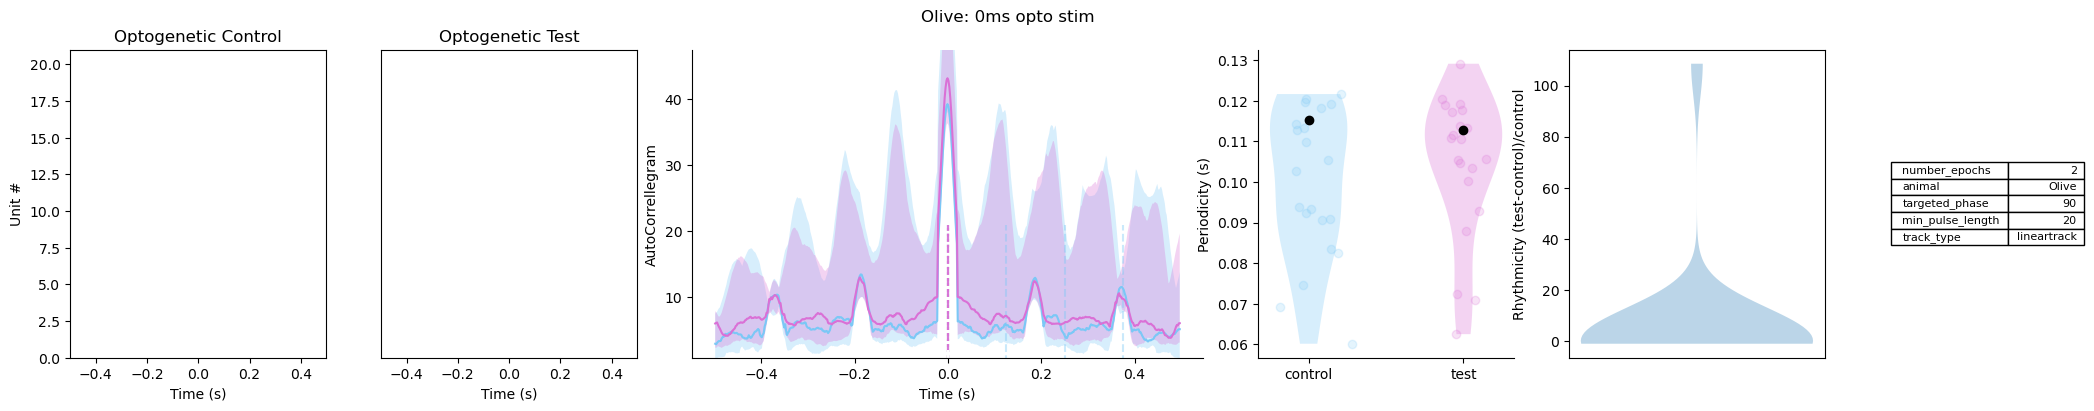

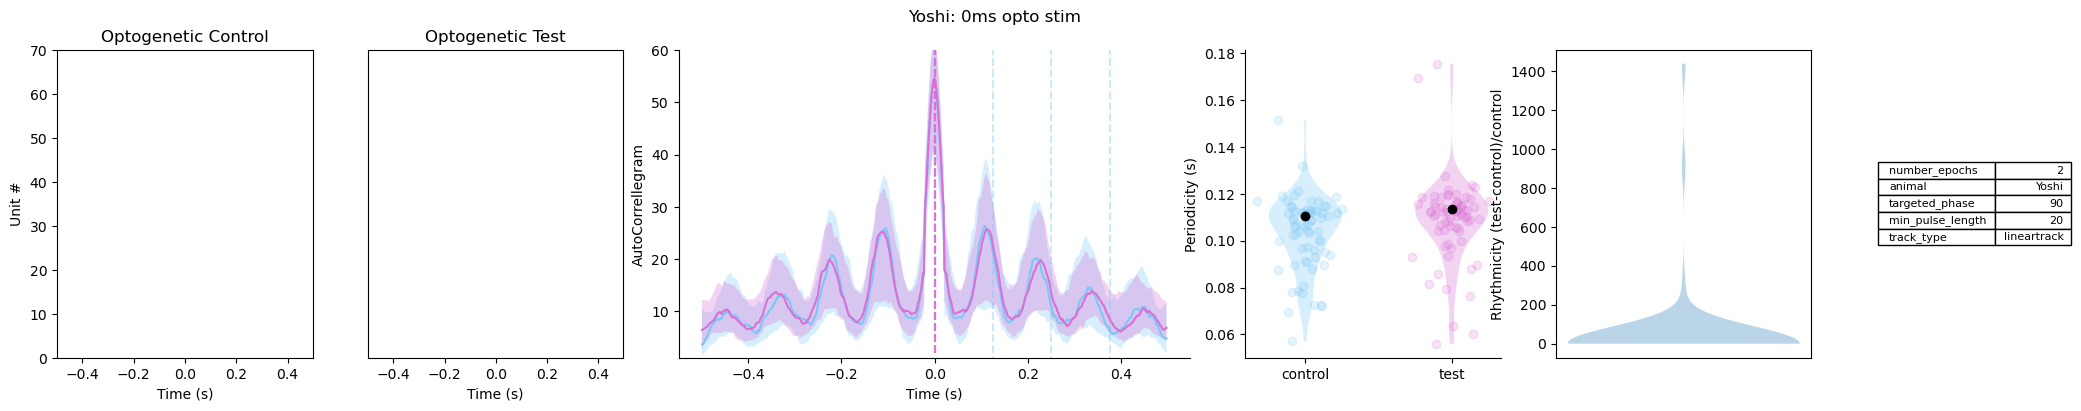

In [14]:


animal_list = ["Winnie", "Frodo", "Totoro", "Wallie", "Olive", "Yoshi"]
# animal_list = ["Winnie","Yoshi"]
# animal_list = ["Olive"]#["Winnie",]# "Yoshi"]
fig_rhythm = plt.figure()
rhythm_list = {}
for i, animal in enumerate(animal_list):
    dataset_key = {
        "animal": animal,
        "targeted_phase": 90,
        "min_pulse_length": 20,
        "track_type": "lineartrack",  # lineartrack"
    }
    try:
        fig, periodicity, autocorr = autocorrelegram(
            dataset_key,
            return_periodicity_results=True,
            return_auto_corr=True,
            linear_detrend=False,
        )
    except:
        continue
    if not len(periodicity[0]):
        continue
    for ii, color in enumerate([interval_style["control"], interval_style["test"]]):
        violin_scatter(
            periodicity[-2][ii],
            i + ii * 0.3,
            ax=fig_rhythm.gca(),
            color=color,
            widths=0.3,
        )
        lower = -0.02
        upper = 1.2
        fig_rhythm.gca().fill_between(
            [i - 0.3, i + 0.7],
            [lower, lower],
            [upper, upper],
            facecolor=animal_style.loc[animal, "color"],
            alpha=0.3,
            zorder=-1,
        )
    rhythm_list[animal] = periodicity[-2]
    # fig.savefig(f"/home/sambray/Pictures/Fig_2/autocorrelogram_{animal}.svg")

# fig_rhythm.gca().plot(
#     [-0.5, len(animal_list) - 0.5], [0, 0], color="grey", linestyle="--"
# )
fig_rhythm.gca().set_xticks(np.arange(len(animal_list)) + 0.3, animal_list)
fig_rhythm.gca().set_ylabel("Rhythmicity")
fig_rhythm.gca().set_xlim([-0.3, len(animal_list) - 0.5])
fig_rhythm.gca().set_ylim(lower, upper)

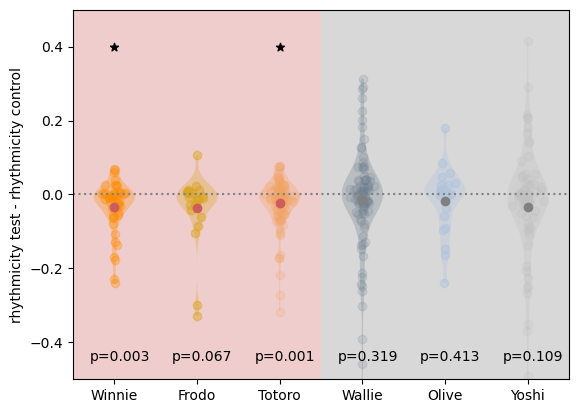

In [55]:
from scipy.stats import ttest_rel
ylim = (-.5,.5)
fig = plt.figure()
ax = fig.gca()
for i,animal in enumerate(rhythm_list):
    rhythms = rhythm_list[animal]
    color = animal_style.loc[animal,"color"]
    transfect_color = animal_style.loc[animal,"background"]
     
    val = (rhythms[1]-rhythms[0])#/(rhythms[0]+1e3)
    # val = np.log10(rhythms[1]/rhythms[0])
    # val = val[np.isfinite(val)]
    violin_scatter(val,pos=i,color=color,bw_method=.3)
    plt.scatter([i],[np.mean(val)],color=transfect_color)   
    pval = ttest_rel(rhythms[0],rhythms[1]).pvalue
    
    
    p_lim=.05
    if pval<p_lim:
        # plt.plot([1.2*i,1.2*i+.5],[ylim[1]-.5,ylim[1]-.5],color='k')
        plt.scatter(i,ylim[1]-.1,marker='*',color='k')
    
    
    plt.text(i-.3,ylim[0]+.05,f"p={pval:.3f}")
    plt.fill_between([i-.5,i+.5],ylim[0],ylim[1],facecolor=transfect_color,alpha=0.3,zorder=-1)
plt.plot([-.5,len(animal_list)],[0,0],c='grey',ls=':')
plt.ylim(*ylim)
plt.xlim(-.5,len(animal_list)-.5)
plt.xticks(np.arange(len(animal_list)),rhythm_list.keys())
plt.ylabel("rhythmicity test - rhythmicity control")
plt.rcParams['svg.fonttype']='none'
fig.savefig("/home/sambray/Documents/MS_analysis_samsplaying/Plots/Fig2C.svg")

# ax.spines[['top','right','bottom']].set_visible(False)

In [4]:
from spyglass.decoding.v1.sorted_spikes import SortedSpikesDecodingV1

SortedSpikesDecodingV1()

nwb_file_name name of the NWB file,unit_filter_params_name,sorted_spikes_group_name,position_group_name,decoding_param_name a name for this set of parameters,encoding_interval descriptive name of this interval list,decoding_interval descriptive name of this interval list,estimate_decoding_params whether to estimate the decoding parameters,results_path path to the results file,classifier_path path to the classifier file
Frodo20230809_.nwb,default_exclusion,08_lineartrack,pos 7 valid times,ms_lineartrack_2023_contfrag_sorted,pos 7 valid times_opto_test_interval,pos 7 valid times,0,=BLOB=,=BLOB=
Wallie20220911_.nwb,default_exclusion,10_lineartrack,pos 9 valid times,ms_lineartrack_contfrag_sorted,pos 9 valid times_opto_test_interval,pos 9 valid times,0,=BLOB=,=BLOB=
Bilbo20230725_.nwb,default_exclusion,06_lineartrack,pos 5 valid times,ms_lineartrack_2023_contfrag_sorted,pos 5 valid times,pos 5 valid times,0,=BLOB=,=BLOB=
Bilbo20230802_.nwb,default_exclusion,02_wtrack,pos 1 valid times,ms_wtrack_2023_contfrag_sorted,pos 1 valid times_stimulus_on_interval,pos 1 valid times,0,=BLOB=,=BLOB=
Bilbo20230802_.nwb,default_exclusion,16_wtrack,pos 15 valid times,ms_wtrack_2023_contfrag_sorted,pos 15 valid times,pos 15 valid times,0,=BLOB=,=BLOB=
Wallie20220911_.nwb,default_exclusion,12_lineartrack,pos 11 valid times,ms_lineartrack_contfrag_sorted,pos 11 valid times,pos 11 valid times,0,=BLOB=,=BLOB=
Totoro20220615_.nwb,default_exclusion,10_wtrack,pos 9 valid times,ms_wtrack_contfrag_sorted,pos 9 valid times,pos 9 valid times,0,=BLOB=,=BLOB=
Yoshi20220513_.nwb,default_exclusion,04_lineartrack,pos 3 valid times,ms_lineartrack_contfrag_sorted,pos 3 valid times,pos 3 valid times,0,=BLOB=,=BLOB=
Wallie20220922_.nwb,default_exclusion,14_wtrack,pos 13 valid times,ms_wtrack_contfrag_sorted,pos 13 valid times,pos 13 valid times,0,=BLOB=,=BLOB=
Winnie20220715_.nwb,default_exclusion,10_lineartrack,pos 9 valid times,ms_lineartrack_contfrag_sorted,pos 9 valid times_opto_test_interval,pos 9 valid times,0,=BLOB=,=BLOB=


In [90]:
fig_rhythm.savefig("/home/sambray/Pictures/Fig_2/autocorrelogram_rhythmicity.svg")